In [1]:
from scapy.all import rdpcap, TCP, IP
from decimal import Decimal, getcontext
import numpy as np
import pandas as pd
import os

## Data Cleaning

In [10]:
df = pd.read_pickle('all_traffic_time_10.pkl')
df

,10_EWMA_chunksizes,10_avg_chunksize,10_chunksizes_50,10_chunksizes_50R,10_chunksizes_75,10_chunksizes_75R,10_chunksizes_85,10_chunksizes_85R,10_chunksizes_90,10_chunksizes_90R,...,userTwoRetransmit,userUrgFlags,userXRetransmit,userZeroRetransmit,service,startup3.3,startup6.6,startup5,startup10,startup_mc
0,"[[12816.0], [211635.2], [60158.47619047619], [...",195061.0,105533.0,105533.0,387028.00,387028.00,430820.70,430820.70,445274.0,445274.0,...,0.000000,0,0.079473,0.545527,netflix,False,True,True,True,6.0
1,"[[198244.0], [486736.8], [457148.38095238095],...",349524.2,323073.0,323073.0,551559.50,551559.50,572144.70,572144.70,616673.8,616673.8,...,0.000000,0,0.108333,0.391667,netflix,False,True,True,True,6.0
2,"[[12786.0], [12811.6], [406599.3333333333], [2...",552724.6,596820.0,596820.0,924952.50,924952.50,972990.20,972990.20,998761.4,998761.4,...,0.000000,0,0.156250,0.218750,netflix,False,True,True,True,6.0
3,"[[772020.0], [642372.0], [536471.8095238095], ...",570248.0,586598.0,586598.0,675663.00,675663.00,745960.40,745960.40,796256.4,796256.4,...,0.000000,0,0.212500,0.412500,netflix,False,True,True,True,6.0
4,"[[503378.0], [572290.0], [287298.0], [474179.5...",659017.2,586598.0,586598.0,935179.00,935179.00,1067529.30,1067529.30,1103884.0,1103884.0,...,0.000000,0,0.125000,0.250000,netflix,False,True,True,True,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728987,"[[1457190.0], [793425.2], [1284808.6666666667]...",2089247.6,1658462.0,1658462.0,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.013889,0,0.011111,0.086111,amazon,False,True,True,True,6.0
728988,"[[1438366.0], [1120964.4], [1335213.238095238]...",2444589.9,2819048.5,2819048.5,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.000000,0,0.006944,0.048611,amazon,False,True,True,True,6.0
728989,"[[1402166.0], [3077212.4], [3206511.904761905]...",2629644.3,2819048.5,2819048.5,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.000000,0,0.006944,0.048611,amazon,False,True,True,True,6.0
728990,"[[3246918.0], [2137170.8], [2937503.904761905]...",2379429.9,2665546.0,2665546.0,3071717.25,3071717.25,3169342.90,3169342.90,3193539.0,3193539.0,...,0.000000,0,0.006944,0.034722,amazon,False,True,True,True,6.0


In [4]:
df = pd.read_pickle('data/video_dataset.pkl')

In [5]:
df

,L7_10_avg_chunksize,L7_10_chunksizes_50,L7_10_chunksizes_75,L7_10_chunksizes_85,L7_10_chunksizes_90,L7_10_max_chunksize,L7_10_min_chunksize,L7_10_std_chunksize,absolute_timestamp,L7_all_prev_down_chunk_iat_50,...,L4_userStdRTT,L4_userStdRetransmit,L4_userStdRwnd,L4_userStrBytesInFlight,L4_userSynFlags,L4_userTwoRetransmit,L4_userUrgFlags,L4_userXRetransmit,L4_userZeroRetransmit,service
0,148947.1,43473.0,185098.0,361832.3,461040.2,539882,4380,185126.042201,1.548881e+09,161.5,...,19684.624818,57.462837,985.136457,0,4,0.0,0,0.108730,0.557937,netflix
1,91984.2,101882.0,122323.0,159843.4,181011.8,196778,24498,62449.107359,1.548881e+09,361.0,...,8183.942278,71.011784,310.123152,0,1,0.0,0,0.116865,0.549802,netflix
2,147725.0,111373.0,224157.0,286280.0,325845.8,396800,24498,134268.559725,1.548881e+09,337.0,...,7087.849223,85.198800,149.669427,0,0,0.0,0,0.126852,0.539815,netflix
3,246420.6,297522.0,330737.5,361030.7,378404.0,396800,24498,127394.372454,1.548881e+09,399.0,...,56963.445789,109.397055,14006.713648,0,1,0.0,0,0.186111,0.480556,netflix
4,336681.0,354461.0,399719.5,409866.3,414060.0,438000,198238,79844.367998,1.548881e+09,414.0,...,10988.579443,122.132897,13261.305817,0,0,0.0,0,0.194444,0.472222,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204708,716771.6,716774.5,1421936.0,1421936.0,1421936.0,1421936,11584,705164.400048,1.526741e+09,345.0,...,10966.145663,556.755831,1982.564801,0,0,0.0,0,0.041667,0.208333,twitch
204709,716922.6,716774.5,1421936.0,1422014.0,1422188.8,1423384,11584,705327.114868,1.526741e+09,345.0,...,57666.040990,444.343805,2702.629938,0,0,0.0,0,0.041667,0.208333,twitch
204710,716916.4,716774.5,1421936.0,1421936.0,1422080.8,1423384,11584,705309.318957,1.526741e+09,345.0,...,1891.933946,621.287002,1307.192897,0,0,0.0,0,0.041667,0.333333,twitch
204711,716916.4,716774.5,1421936.0,1421936.0,1422080.8,1423384,11584,705309.318957,1.526741e+09,345.0,...,44480.935202,427.181318,2313.892438,0,0,0.0,0,0.041667,0.320833,twitch


In [6]:
valid_resolutions = [280, 360, 480, 720, 1080]
unwanted_data = ["video_id", "home_id"]
# unwanted_data = [
#   "video_id",
#   "video_position",
#   "index",
#   'home_id',
#   "relative_timestamp",
#   "absolute_timestamp",
#   'resolution', 
#   'session_id'
# ]
df = df.drop(columns=unwanted_data)
df.columns

In [16]:
string_columns = [col for col in df.columns if df[col].dtype == 'object']
string_columns

['session_id', 'service']

In [20]:
df['service'].head(), df['session_id'].head()

(0    netflix
 1    netflix
 2    netflix
 3    netflix
 4    netflix
 Name: service, dtype: object,
 0    7ff91b2519956acd8d59932235005743
 1    7ff91b2519956acd8d59932235005743
 2    7ff91b2519956acd8d59932235005743
 3    7ff91b2519956acd8d59932235005743
 4    7ff91b2519956acd8d59932235005743
 Name: session_id, dtype: object)

In [14]:
# df_filtered = df.drop(columns=string_columns, errors='ignore')

## Quality Inference via RF

In [21]:
import numpy as np

train_sessions = np.random.choice(df['session_id'].unique(), int(df['session_id'].unique().shape[0]*.8), replace=False)
test_sessions = df[~df['session_id'].isin(train_sessions)]['session_id'].unique()

df_train = df[df['session_id'].isin(train_sessions)]
df_test = df[df['session_id'].isin(test_sessions)]

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import linear_model, ensemble, tree, model_selection, metrics
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

x_train = df_train.drop(['resolution', 'session_id', 'service'], axis=1).values
x_test = df_test.drop(['resolution', 'session_id', 'service'], axis=1).values

classes = [240,360,480,720,1080]

y_train_not_binarized = df_train['resolution'].values
y_train_binarized = label_binarize(y_train_not_binarized, classes=classes)
y_test_not_binarized = df_test['resolution']
y_test_binarized = label_binarize(y_test_not_binarized, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [27]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier())

gen_clf = classifier.fit(x_train, y_train_binarized)

y_score = gen_clf.predict_proba(x_test)

n_classes = y_test_binarized.shape[1]

In [33]:
import numpy as np
from sklearn.metrics import roc_curve, auc  # Make sure auc is imported correctly

# Assuming y_test_binarized and y_score are defined correctly and have the right shapes
n_classes = y_test_binarized.shape[1]

# Calculate ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # auc here should work as expected if imported correctly

# Compute the Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Ensure auc is the function from sklearn.metrics and not overridden or blocked by another variable/type
print("Micro-average ROC curve area:", roc_auc["micro"])

Micro-average ROC curve area: 0.9894670613001693


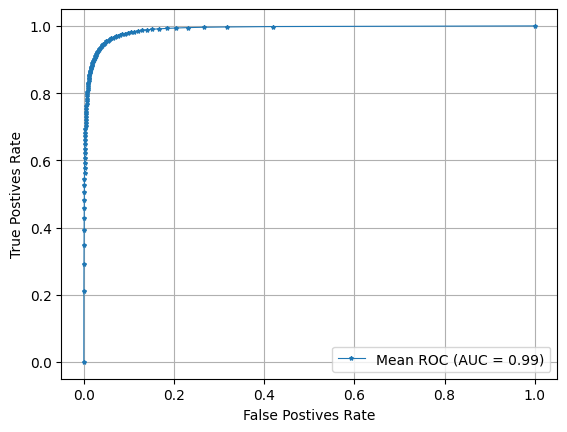

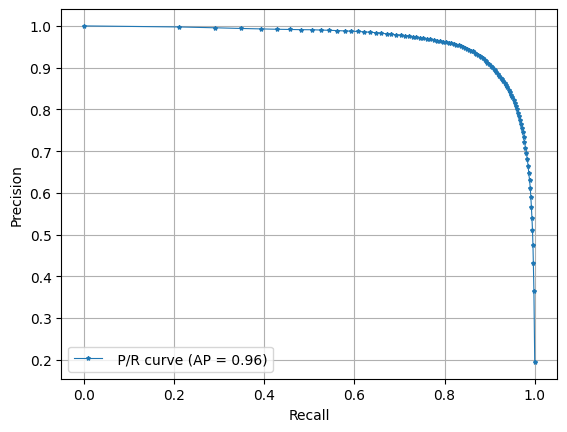

In [35]:
# A "micro-average": quantifying score on all classes jointly
precision = dict()
recall = dict()
average_precision = dict()

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

plt.plot(fpr["micro"], tpr["micro"], label='Mean ROC (AUC = %0.2f)' % (roc_auc["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('False Postives Rate')
plt.ylabel('True Postives Rate')
plt.grid(True, which='major', axis='both')
plt.legend()
plt.show()

plt.plot(recall["micro"], precision["micro"], label=' P/R curve (AP = %0.2f)' % (average_precision["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True, which='major', axis='both')
plt.show()

## Feature Importance_

In [40]:
# Collect in an ordered array the features and their importance in the prediction
feature_importance = []
features = df_train.drop(['resolution', 'session_id', 'service'], axis=1).columns.tolist()

# Here is an example of how to get the feature importance for 
for i, feature in enumerate(features):
  feature_importance.append({'name': feature, 'GINI_index': gen_clf.estimators_[1].feature_importances_[i]})

feature_importance = sorted(feature_importance, key=lambda k: k['GINI_index'], reverse=True)

In [41]:
feature_importance

[{'name': 'L7_allprev_max_chunksize', 'GINI_index': 0.035366662078805615},
 {'name': 'L7_allprev_std_chunksize', 'GINI_index': 0.02816437511868376},
 {'name': 'absolute_timestamp', 'GINI_index': 0.023824435231032007},
 {'name': 'L7_allprev_chunksizes_50', 'GINI_index': 0.021939868406530307},
 {'name': 'L7_allprev_avg_chunksize', 'GINI_index': 0.021398192941792564},
 {'name': 'L7_allprev_chunksizes_75', 'GINI_index': 0.0213669761522173},
 {'name': 'L7_allprev_min_chunksize', 'GINI_index': 0.01953449285686897},
 {'name': 'L7_all_prev_up_chunk_iat_85', 'GINI_index': 0.019141349194447266},
 {'name': 'L7_cumsum_chunksizes', 'GINI_index': 0.019040201939538877},
 {'name': 'L4_userStdBytesInFlight', 'GINI_index': 0.018691721827782386},
 {'name': 'L7_all_prev_down_chunk_iat_90', 'GINI_index': 0.01771688087027241},
 {'name': 'L7_allprev_chunksizes_90', 'GINI_index': 0.017674146793262156},
 {'name': 'L7_10_avg_chunksize', 'GINI_index': 0.017401917820891257},
 {'name': 'L7_all_prev_down_chunk_iat_

                       name  GINI_index
0  L7_allprev_max_chunksize    0.035367
1  L7_allprev_std_chunksize    0.028164
2        absolute_timestamp    0.023824
3  L7_allprev_chunksizes_50    0.021940
4  L7_allprev_avg_chunksize    0.021398


/tmp/ipykernel_1165/1813954981.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")


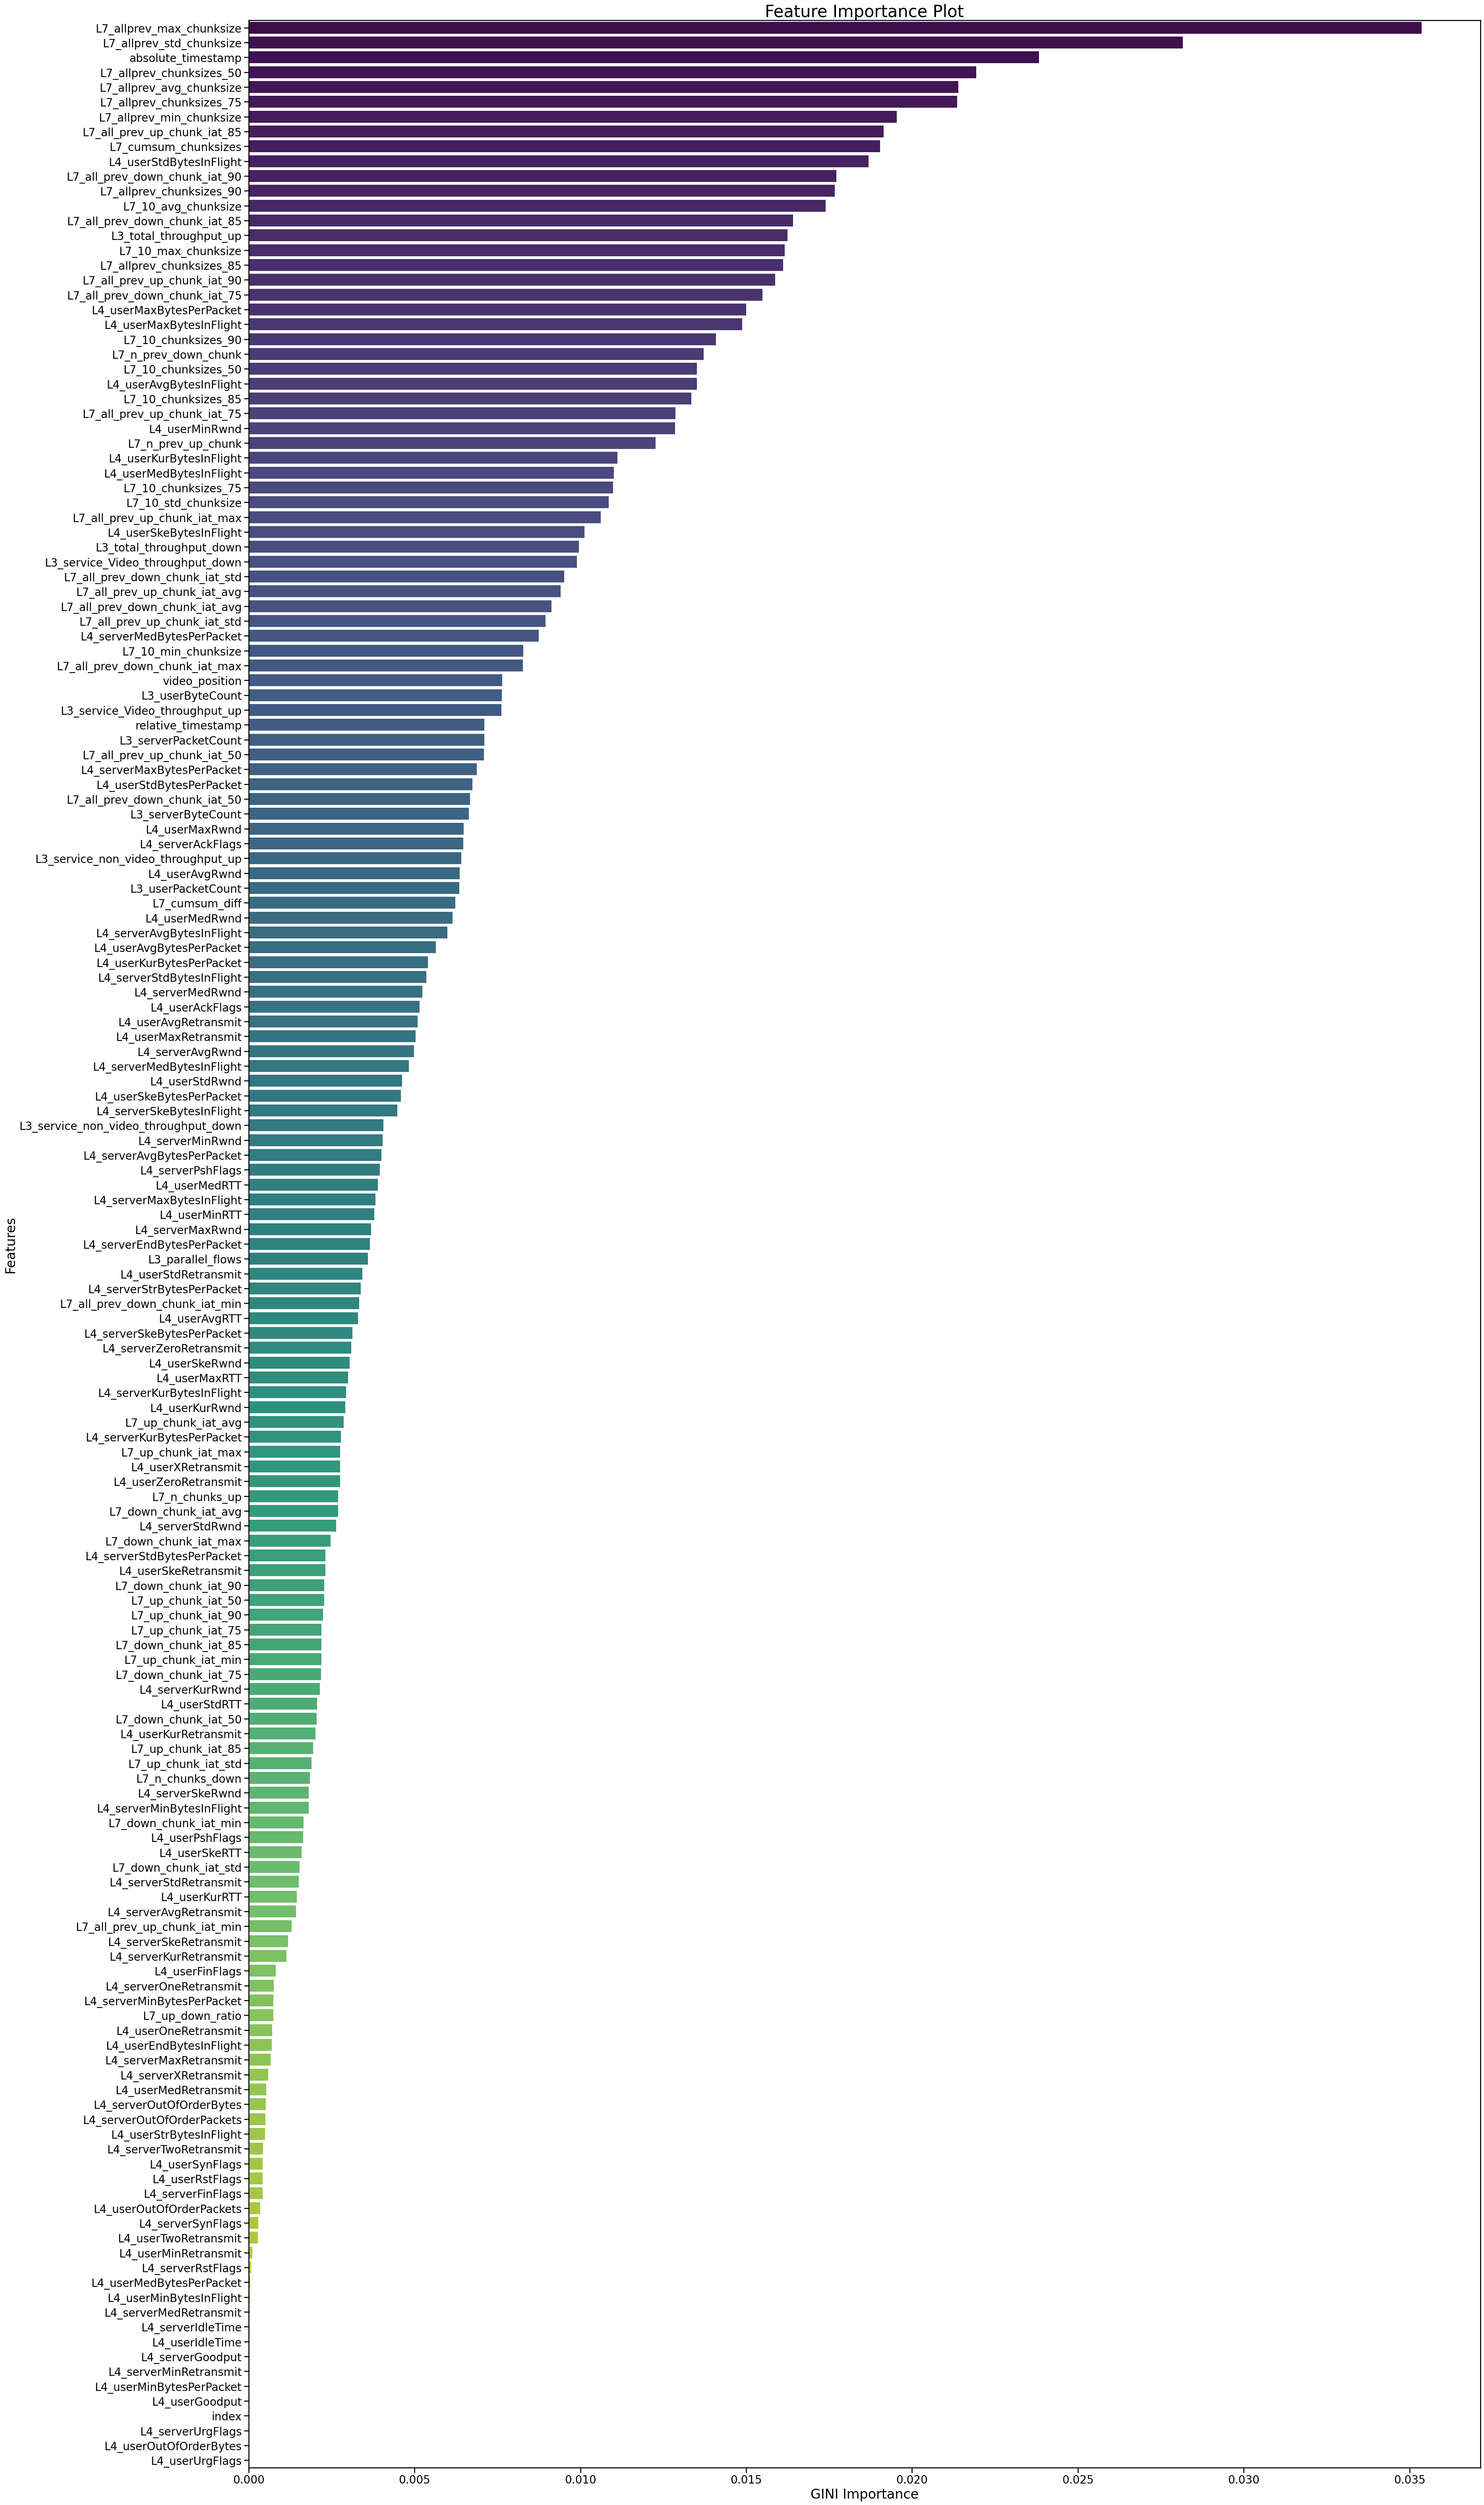

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sorted feature importance data to a DataFrame
df_feature_importance = pd.DataFrame(feature_importance)
print(df_feature_importance.head())

# Set the plot size
plt.figure(figsize=(40, 80))  # Increase the figure size (width, height) as needed

# Set larger font sizes
sns.set_context("talk")  # 'talk' is larger than the default. Other options include 'paper', 'notebook', 'talk', 'poster'

# Creating a bar plot
sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")

# Adding plot labels and title with increased font sizes
plt.xlabel('GINI Importance', fontsize=24)  # Increase font size for x-label
plt.ylabel('Features', fontsize=24)  # Increase font size for y-label
plt.title('Feature Importance Plot', fontsize=30)  # Increase font size for title

# Optionally, you can adjust tick parameters for both axes
plt.xticks(fontsize=20)  # Increase font size for x-ticks
plt.yticks(fontsize=20)  # Increase font size for y-ticks

# Display the plot
plt.show()


## Select features by layer (TODO)

In [ ]:
l3_features = [col for col in df.columns if 'L3' in col]

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Load data
x_train = df_train.drop(['resolution', 'session_id', 'service'], axis=1).values
x_test = df_test.drop(['resolution', 'session_id', 'service'], axis=1).values

y_train_not_binarized = df_train['resolution'].values
y_train_binarized = label_binarize(y_train_not_binarized, classes=classes)
y_test_not_binarized = df_test['resolution'].values
y_test_binarized = label_binarize(y_test_not_binarized, classes=classes)

l3_features = [col for col in X.columns if 'L3' in col]
l4_features = [col for col in X.columns if 'L4' in col]
# more...


## Replicate the study of inferecing Quality inference
# train_and_evaluate(l3_features, y_train_binarized)
# train_and_evaluate(l4_features, y_train_binarized)

## Predict resolution of a Youtube / Netflix / Twitch session 

In [56]:
# df_session

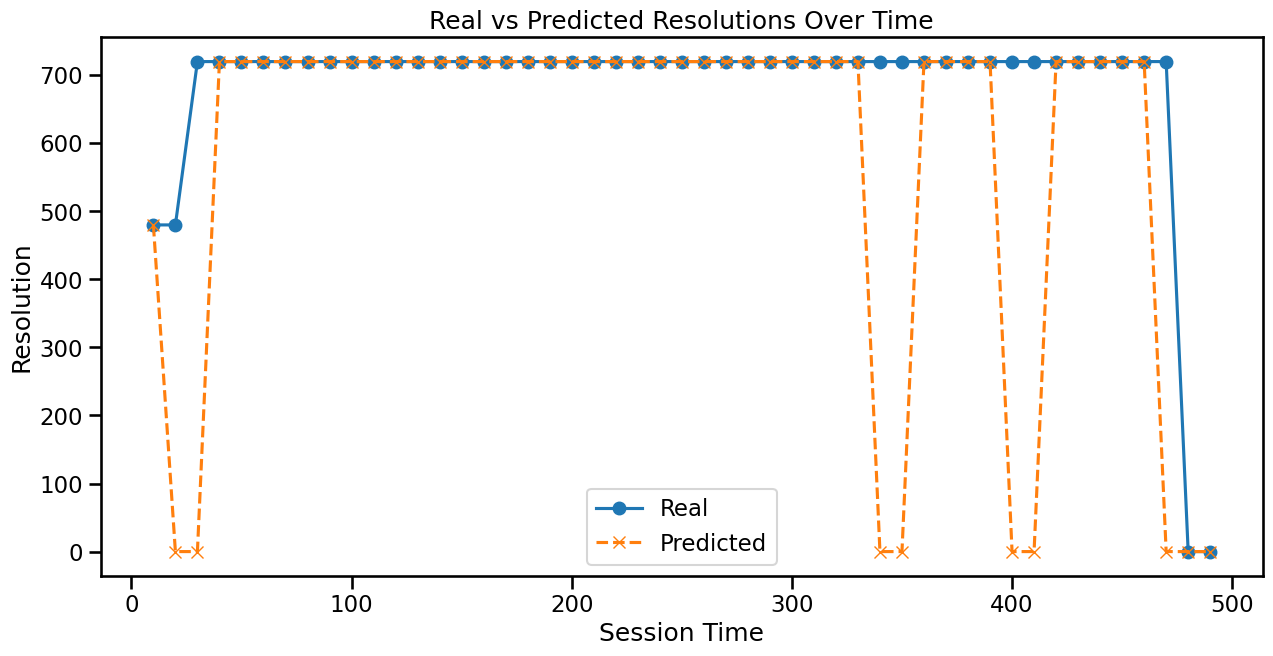

In [57]:
df_session = pd.read_pickle("data/netflix_session.pkl")

# unwanted_data = [
#   "video_id",
#   "video_position",
#   "index",
#   'home_id',
#   "relative_timestamp",
#   "absolute_timestamp",
#   'resolution', 
#   'session_id'
# ]
unwanted_data = ["video_id", "home_id", 'resolution', 'session_id']

# Predict the inferred resolutions and compare
#TODO
x = df_session.drop(columns=unwanted_data).values
y = [0 if v is None else int(v) for v in df_session['resolution'].values]
classes = [240, 360, 480, 720, 1080] 
y_binarized = label_binarize(y, classes=classes)

predicted_binarized = gen_clf.predict(x)  # direct class prediction
predicted_resolutions = [classes[np.argmax(row)] if np.max(row) > 0 else 0 for row in predicted_binarized]

# You can use this code to plot the result (predicted_resolutions is a list)
plt.figure(figsize=(15, 7))  # Set figure size for better readability
plt.plot(df_session['relative_timestamp'].values, y, label='Real', marker='o', linestyle='-')
plt.plot(df_session['relative_timestamp'].values, predicted_resolutions, label='Predicted', marker='x', linestyle='--')
plt.xlabel('Session Time')
plt.ylabel('Resolution')
plt.title('Real vs Predicted Resolutions Over Time')
plt.legend()
plt.show()